In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# load penguins data set
penguins = sns.load_dataset('penguins')

print("Q2.1.1 Data Preprocessing:")

#print out the original number of data points
original_data_points = len(penguins)
print(f"Number of data points in the whole dataset originally: {original_data_points}")

# delete the data points that contain NaN or Null 
penguins = penguins.dropna()
remaining_data_points = len(penguins)
print(f"Number of data points in the whole dataset after deleting incomplete data: {remaining_data_points}")

# transform string type feature into numerical type feature
label_encoder_species = LabelEncoder()
penguins['species'] = label_encoder_species.fit_transform(penguins['species'])

label_encoder_other = LabelEncoder()
if 'sex' in penguins.columns:
    penguins['sex'] = label_encoder_other.fit_transform(penguins['sex'])
if 'island' in penguins.columns:
    penguins['island'] = label_encoder_other.fit_transform(penguins['island'])

# seperate features and objective variables
X = penguins.drop(columns=['species'])
y = penguins['species']

# randomly split the data, 70% of training data while 30% of testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#output the length of training data set and the length of test data set
print(f"Number of data points in the training set after splitting: {len(X_train)}")
print(f"Number of data points in the test set after splitting: {len(X_test)}")

y_train = label_encoder_species.fit_transform(y_train)
y_test = label_encoder_species.transform(y_test)

Q2.1.1 Data Preprocessing:
Number of data points in the whole dataset originally: 344
Number of data points in the whole dataset after deleting incomplete data: 333
Number of data points in the training set after splitting: 233
Number of data points in the test set after splitting: 100


Q2.1.2 Data Statistics:


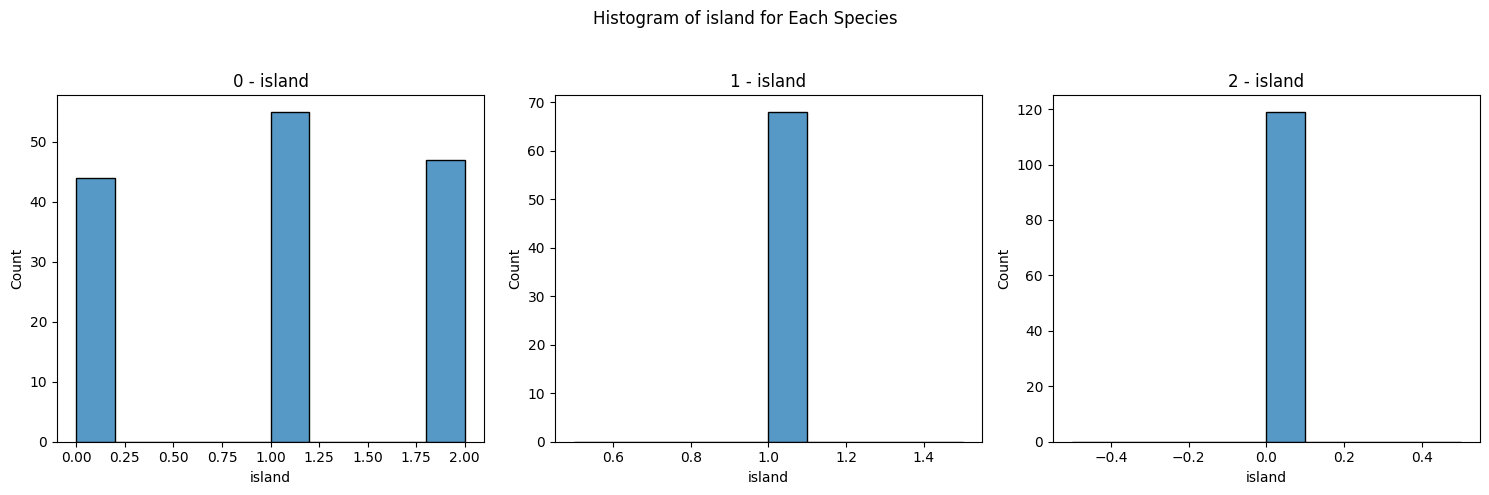

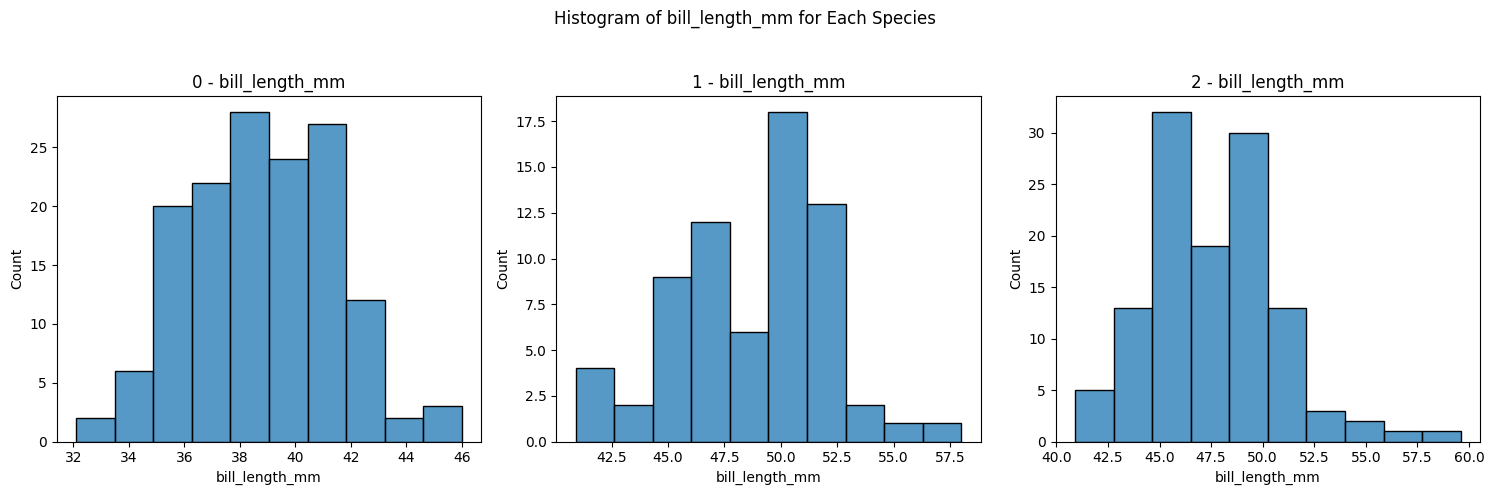

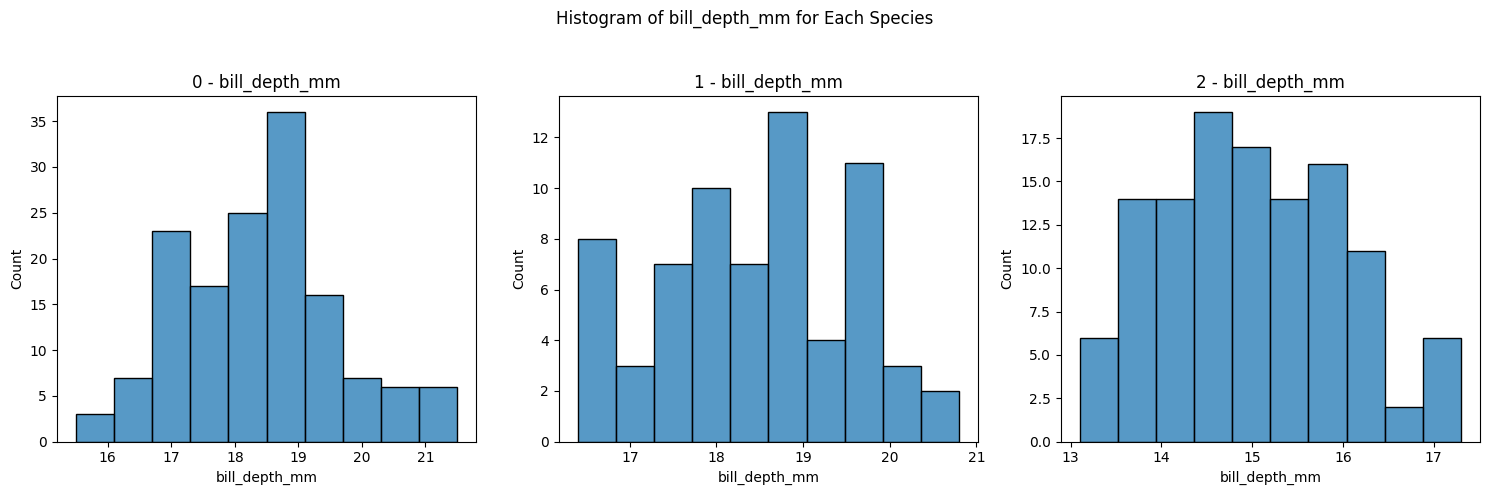

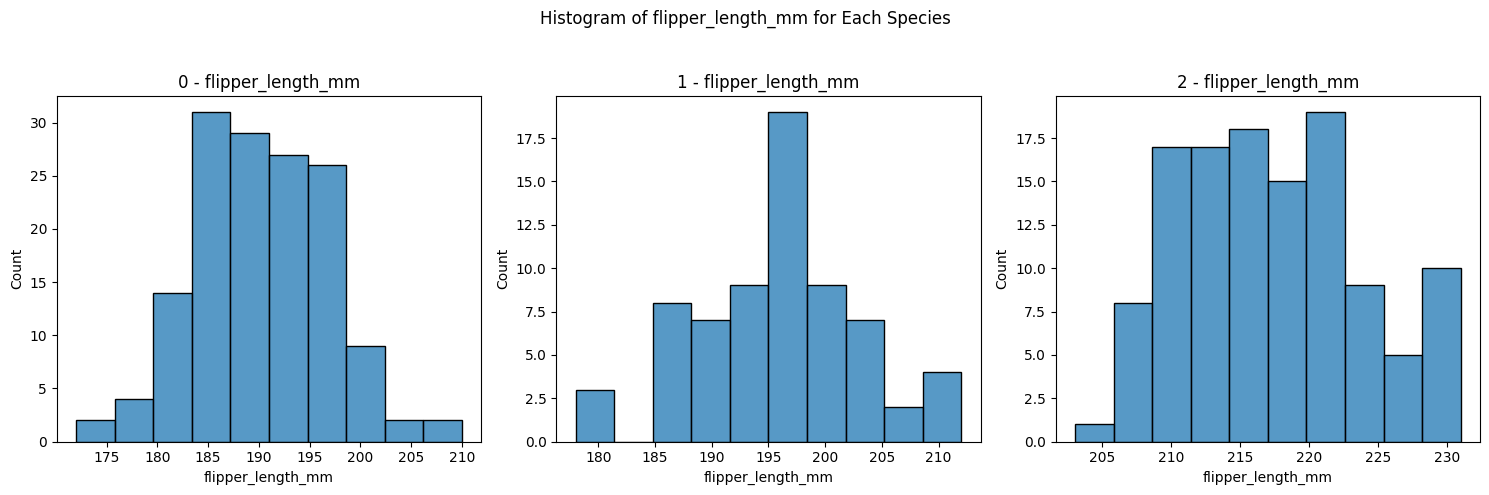

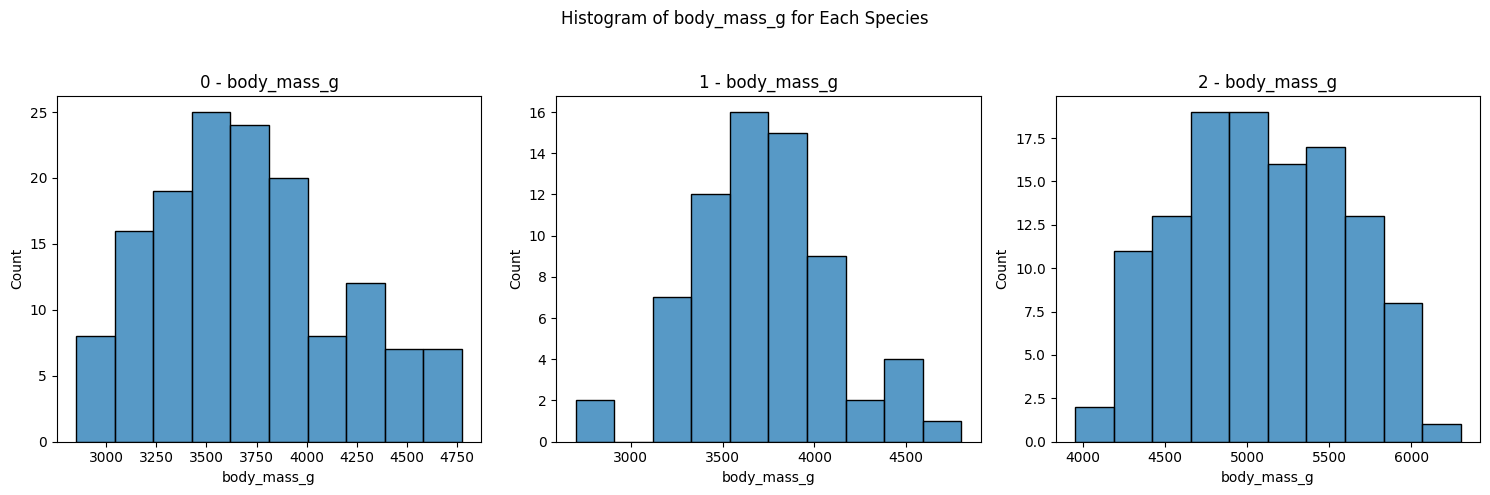

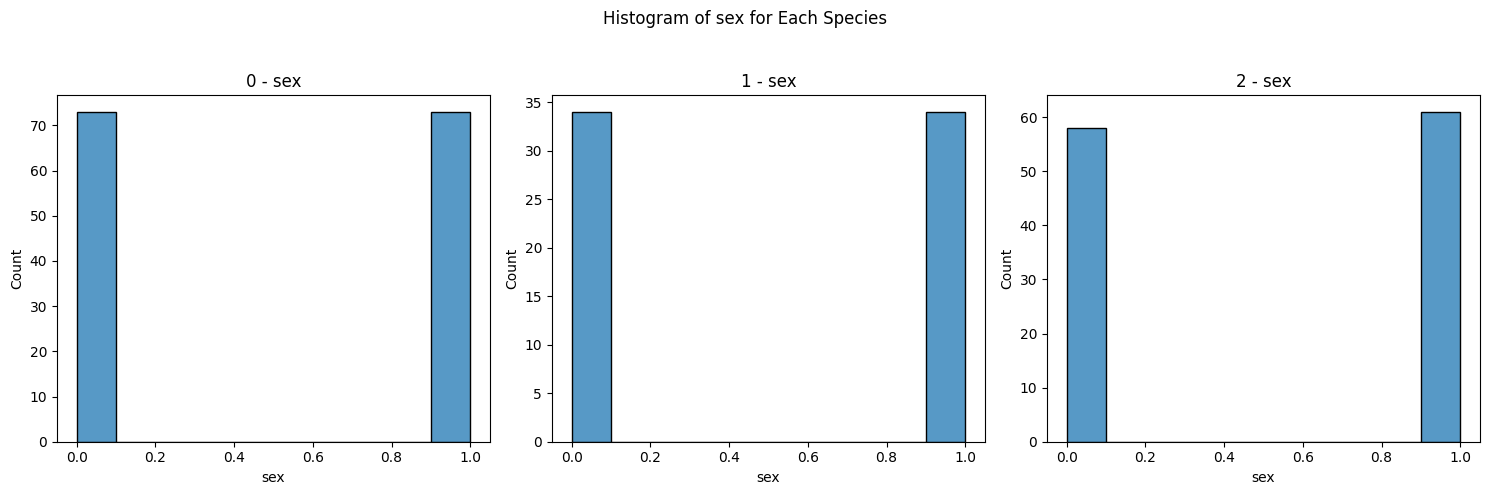

In [ ]:
#Statistic and visualization
print("Q2.1.2 Data Statistics:")
features = X.columns
species_names = label_encoder_species.inverse_transform([0, 1, 2])
for feature in features:
    plt.figure(figsize=(15, 5))
    for i, species in enumerate(species_names):
        plt.subplot(1, 3, i + 1)
        sns.histplot(data=penguins[penguins['species'] == i], x=feature, kde=False, bins=10)
        plt.title(f"{species} - {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
    plt.suptitle(f"Histogram of {feature} for Each Species")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Q2.1.3 Decision Tree:

Results with maximum depth as 3 and least node size as 1:
Training accuracy: 0.97, Test accuracy: 0.98


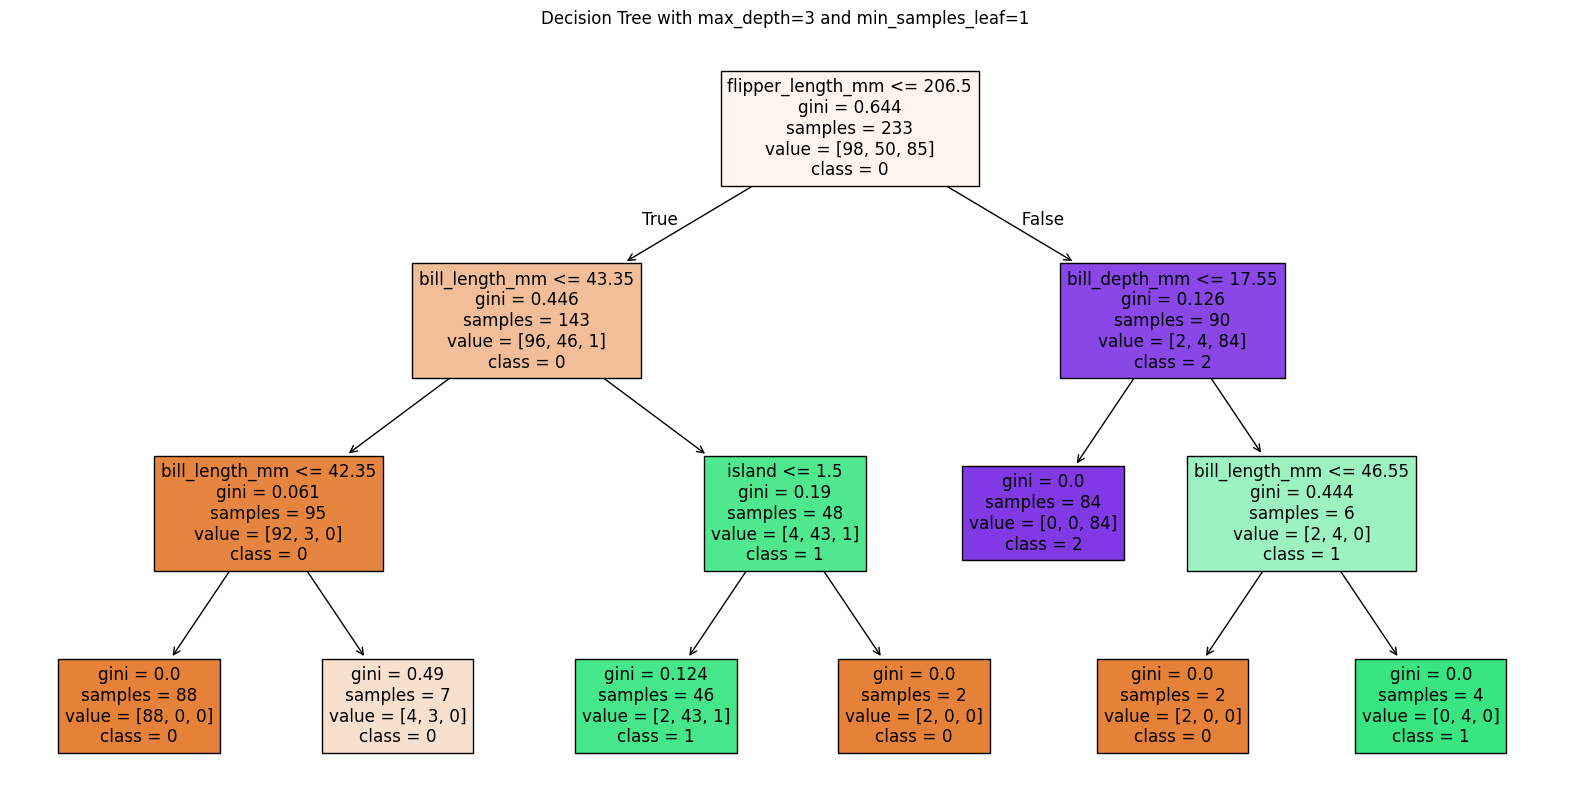


Results with maximum depth as 3 and least node size as 3:
Training accuracy: 0.96, Test accuracy: 0.98


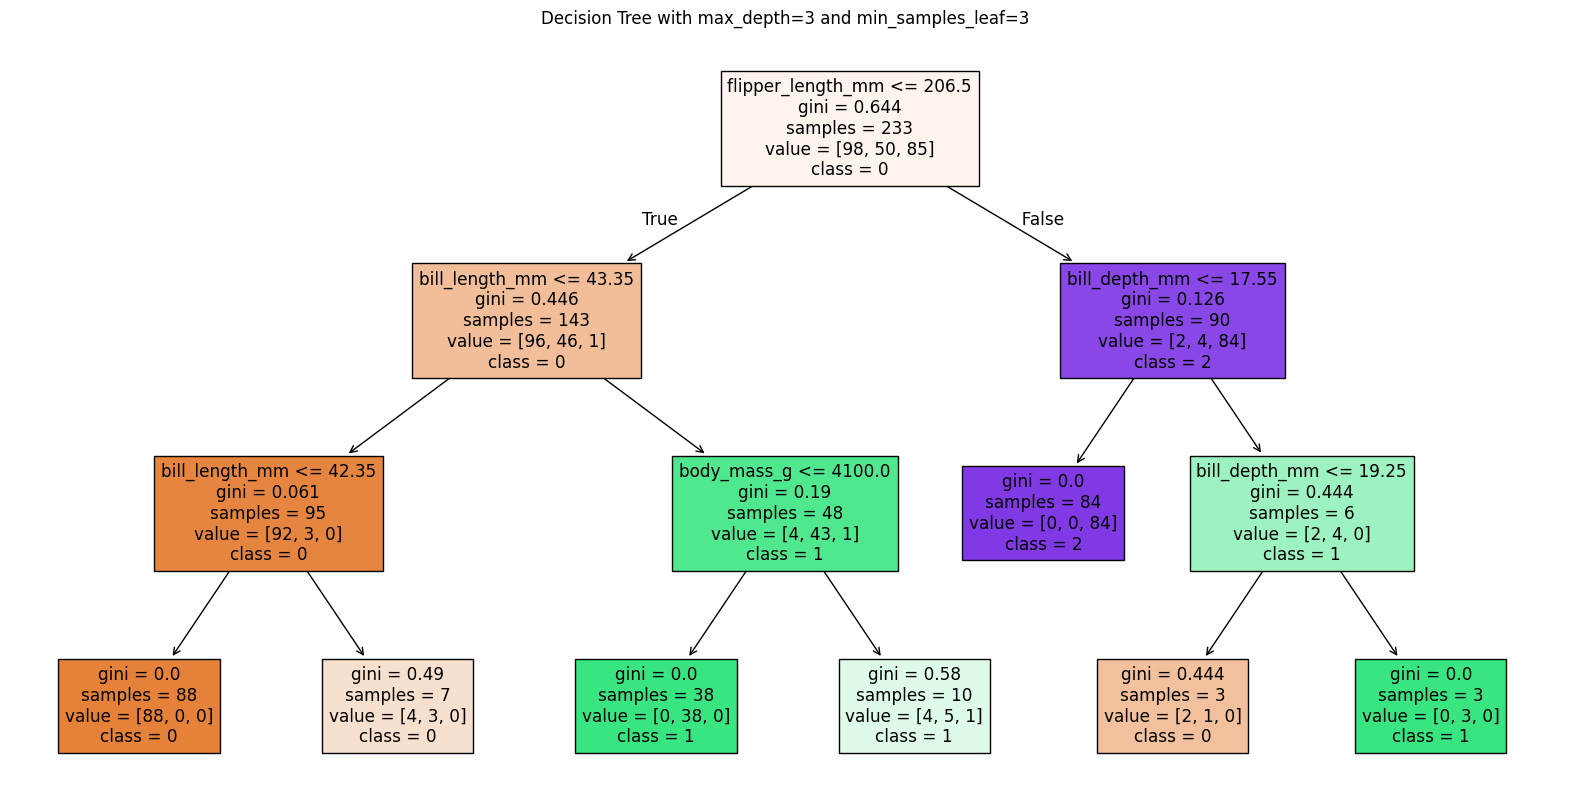


Results with maximum depth as 3 and least node size as 5:
Training accuracy: 0.96, Test accuracy: 0.98


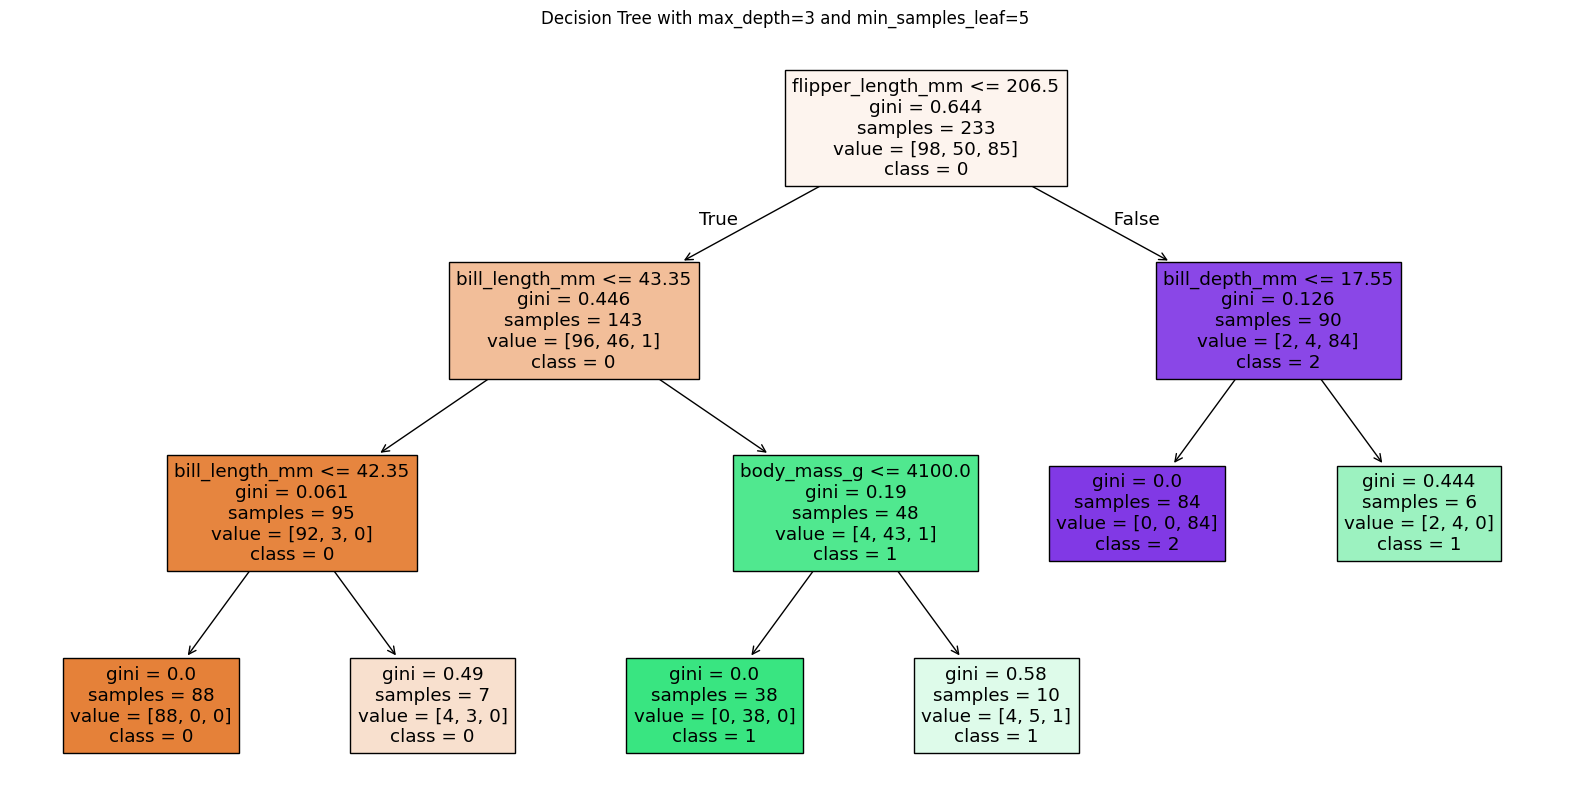


Results with maximum depth as 5 and least node size as 1:
Training accuracy: 1.00, Test accuracy: 0.98


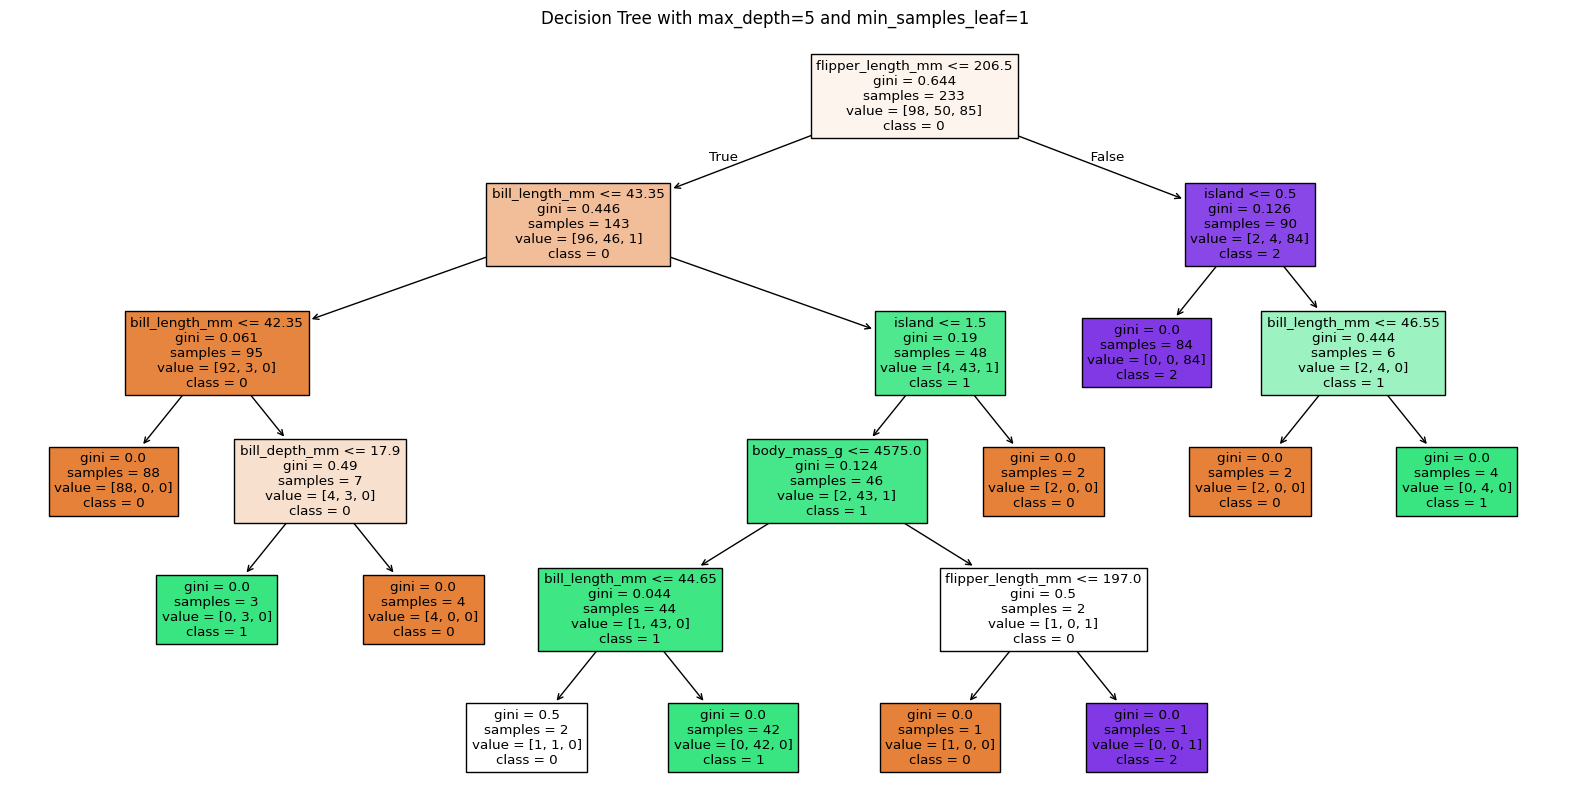


Results with maximum depth as 5 and least node size as 3:
Training accuracy: 0.99, Test accuracy: 0.98


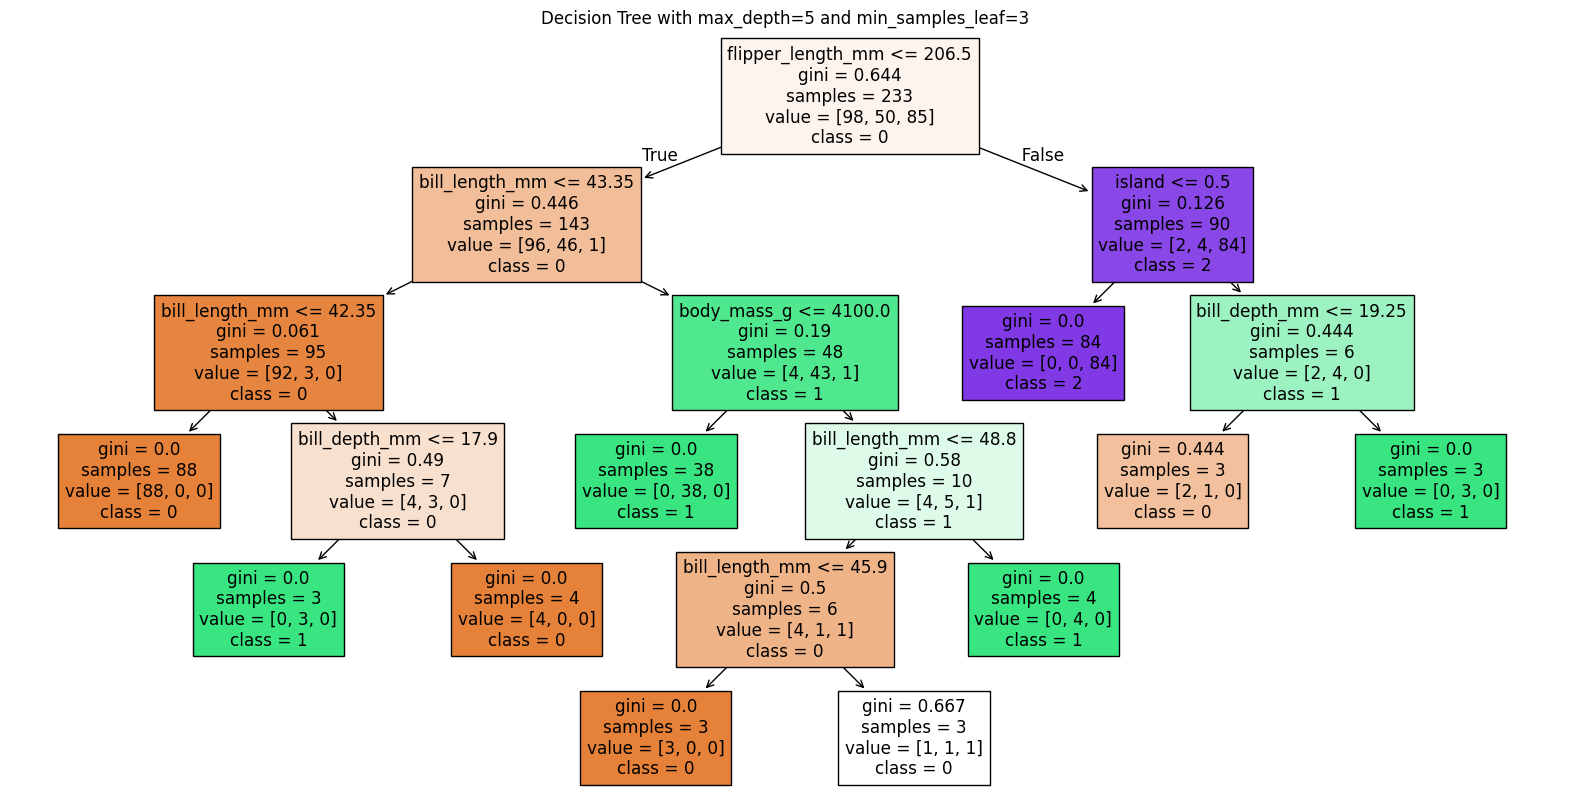


Results with maximum depth as 5 and least node size as 5:
Training accuracy: 0.97, Test accuracy: 0.98


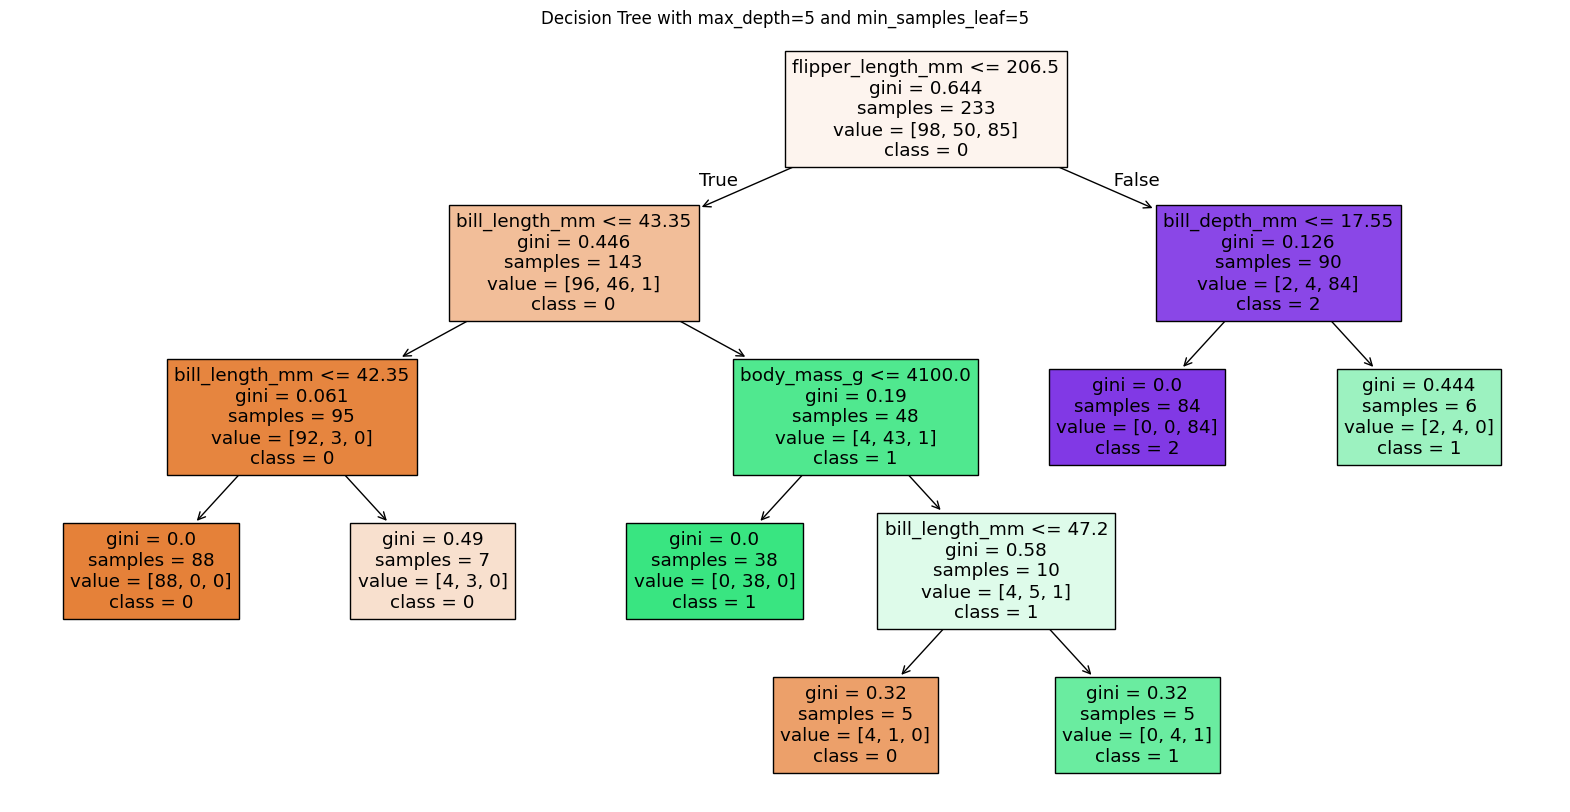


Results with maximum depth as 7 and least node size as 1:
Training accuracy: 1.00, Test accuracy: 0.98


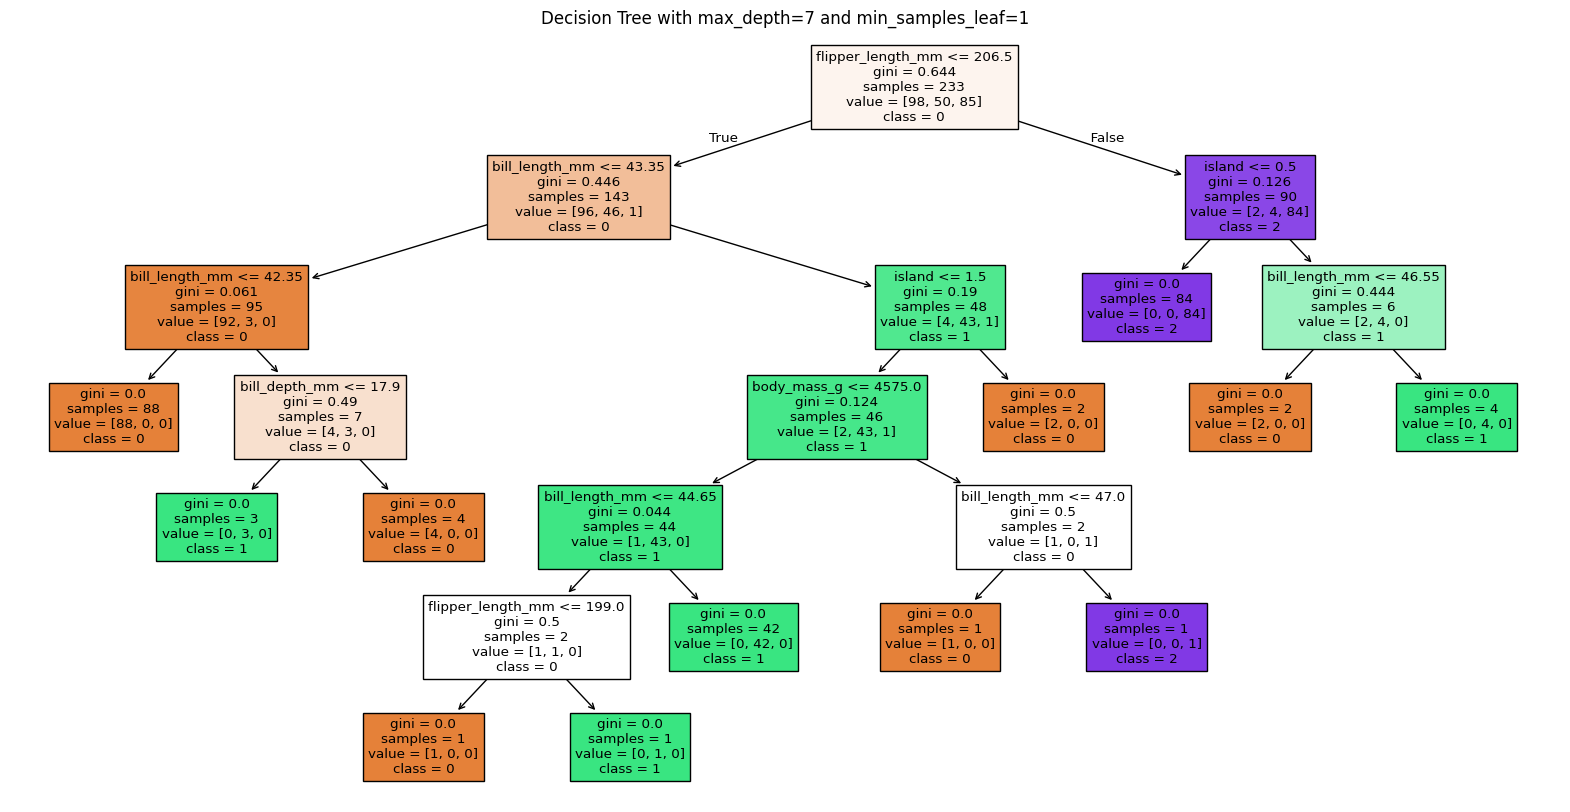


Results with maximum depth as 7 and least node size as 3:
Training accuracy: 0.99, Test accuracy: 0.98


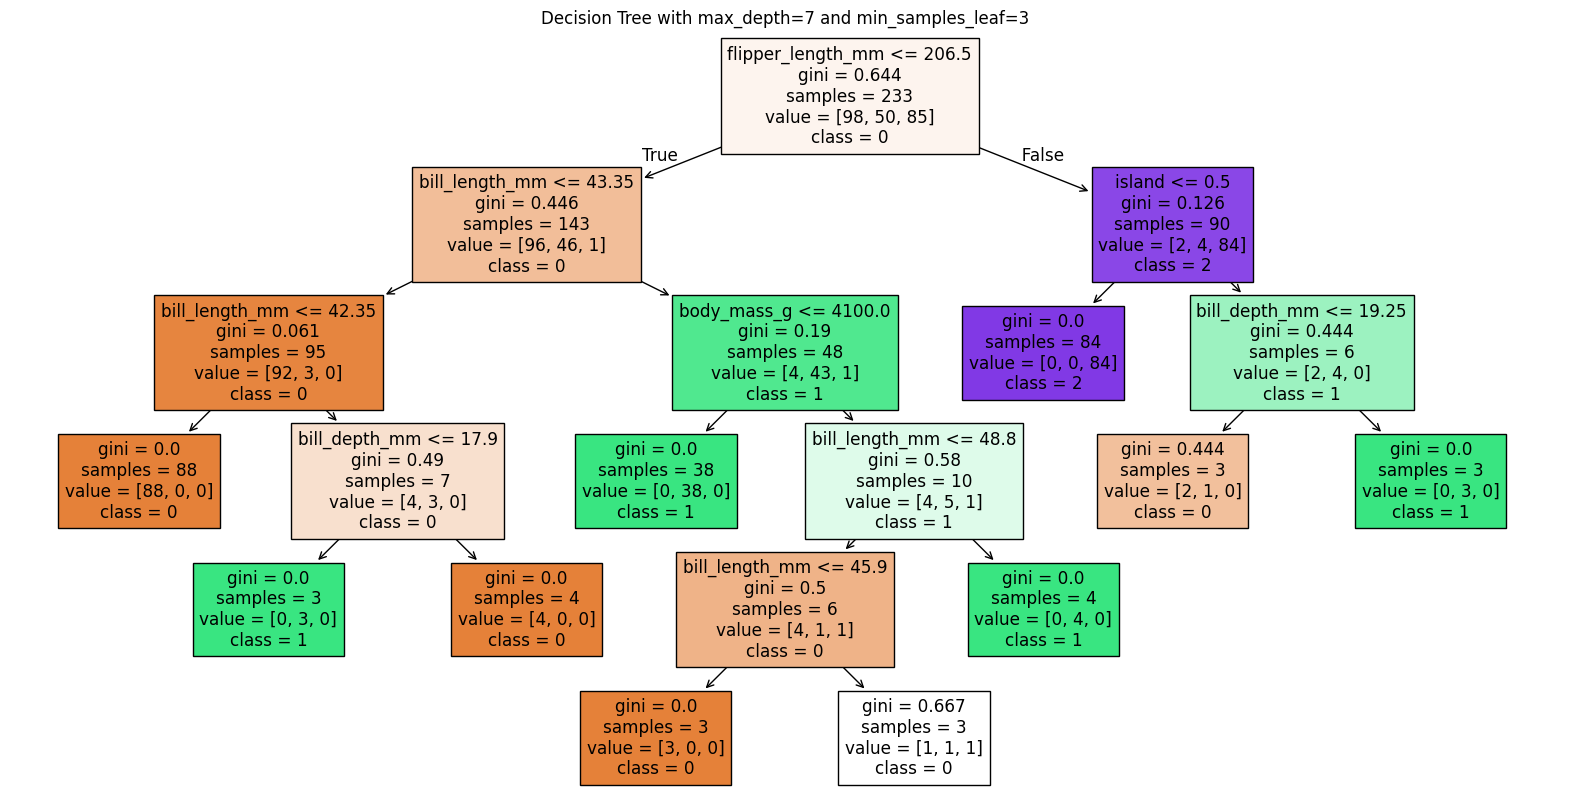


Results with maximum depth as 7 and least node size as 5:
Training accuracy: 0.97, Test accuracy: 0.98


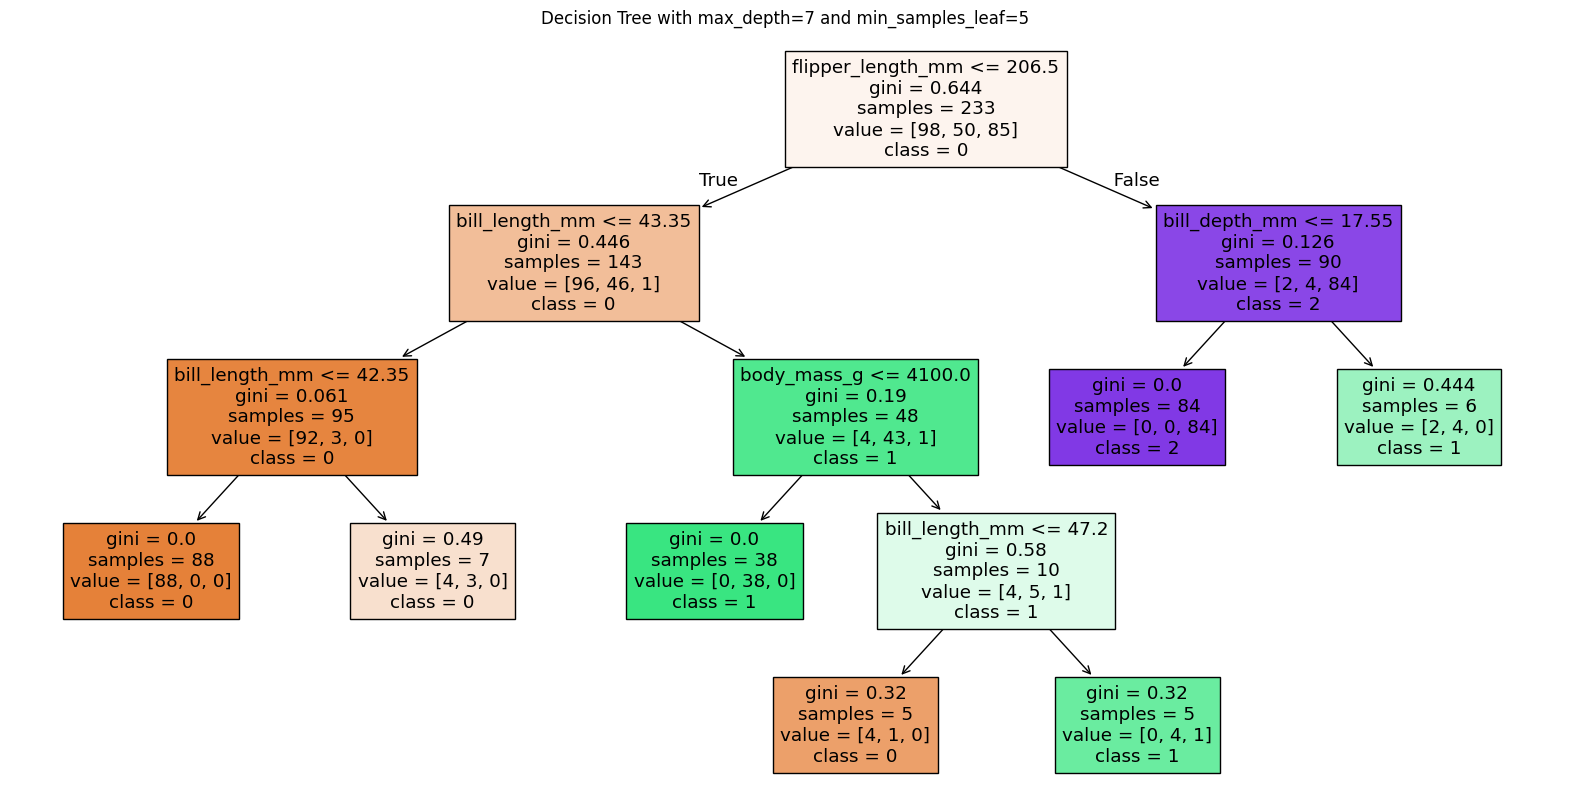

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Decision Tree method
print("Q2.1.3 Decision Tree:")
max_depths = [3, 5, 7]  # 3 kinds of max depth
tree_min_samples = [1, 3, 5]  # 3 knids of least nodes sizes

for d in max_depths:
    for n in tree_min_samples:
        #initialize decision tree classifier
        clf = DecisionTreeClassifier(max_depth=d, min_samples_leaf=n, random_state=42)
        # fit training datas into model
        clf.fit(X_train, y_train)
        # calculate the accuracy on training data set and test data set
        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))
        #output the results
        print(f"\nResults with maximum depth as {d} and least node size as {n}:")
        print(f"Training accuracy: {train_accuracy:.2f}, Test accuracy: {test_accuracy:.2f}")
        # plot the decision tree
        plt.figure(figsize=(20, 10))
        plot_tree(clf, feature_names=X.columns, class_names=[str(cls) for cls in label_encoder_species.classes_], filled=True)
        plt.title(f"Decision Tree with max_depth={d} and min_samples_leaf={n}")
        plt.show()


In [ ]:
# Use Bagging method to classify
from sklearn.ensemble import BaggingClassifier
print("Q2.1.4 Bagging of Trees:")
number_of_trees = [10, 20, 30]  # 3 kinds of number of trees

for d in max_depths:
    for n in number_of_trees:
        # initialize basic Tree decision method classifier
        base_clf = DecisionTreeClassifier(max_depth=d, random_state=42)
        # initialize Bagging classifier
        bagging_clf = BaggingClassifier(n_estimators=n, random_state=42, estimator= base_clf)
        # fit training datas into Bagging model
        bagging_clf.fit(X_train, y_train)
        #calculate the accuracy on test set and training set
        train_accuracy = accuracy_score(y_train, bagging_clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, bagging_clf.predict(X_test))
        # print out the result
        print(f"\nResults with maximum depth as {d} and number of trees as {n}:")
        print(f"Training accuracy: {train_accuracy:.2f}, Test accuracy: {test_accuracy:.2f}")


Q2.1.4 Bagging of Trees:

Results with maximum depth as 3 and number of trees as 10:
Training accuracy: 0.98, Test accuracy: 0.98

Results with maximum depth as 3 and number of trees as 20:
Training accuracy: 0.98, Test accuracy: 0.98

Results with maximum depth as 3 and number of trees as 30:
Training accuracy: 0.98, Test accuracy: 0.98

Results with maximum depth as 5 and number of trees as 10:
Training accuracy: 1.00, Test accuracy: 0.99

Results with maximum depth as 5 and number of trees as 20:
Training accuracy: 1.00, Test accuracy: 0.98

Results with maximum depth as 5 and number of trees as 30:
Training accuracy: 1.00, Test accuracy: 0.98

Results with maximum depth as 7 and number of trees as 10:
Training accuracy: 1.00, Test accuracy: 0.99

Results with maximum depth as 7 and number of trees as 20:
Training accuracy: 1.00, Test accuracy: 0.98

Results with maximum depth as 7 and number of trees as 30:
Training accuracy: 1.00, Test accuracy: 0.98


In [ ]:
# Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier

print("Q2.1.5 Random Forests:")
for d in max_depths:
    for n in number_of_trees:
        rf_clf = RandomForestClassifier(max_depth=d, n_estimators=n, random_state=42)  # initialize random forest classifier
        # train the random forest model
        rf_clf.fit(X_train, y_train)
        # calculate the accuracy of test set and training set
        train_accuracy = accuracy_score(y_train, rf_clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
        # print out the result
        print(f"\nResults with maximum depth as {d} and number of trees as {n}:")
        print(f"Training accuracy: {train_accuracy:.2f}, Test accuracy: {test_accuracy:.2f}")


Q2.1.5 Random Forests:

Results with maximum depth as 3 and number of trees as 10:
Training accuracy: 0.98, Test accuracy: 0.98

Results with maximum depth as 3 and number of trees as 20:
Training accuracy: 0.99, Test accuracy: 0.98

Results with maximum depth as 3 and number of trees as 30:
Training accuracy: 0.98, Test accuracy: 0.98

Results with maximum depth as 5 and number of trees as 10:
Training accuracy: 1.00, Test accuracy: 0.99

Results with maximum depth as 5 and number of trees as 20:
Training accuracy: 1.00, Test accuracy: 0.99

Results with maximum depth as 5 and number of trees as 30:
Training accuracy: 1.00, Test accuracy: 0.98

Results with maximum depth as 7 and number of trees as 10:
Training accuracy: 1.00, Test accuracy: 0.99

Results with maximum depth as 7 and number of trees as 20:
Training accuracy: 1.00, Test accuracy: 0.99

Results with maximum depth as 7 and number of trees as 30:
Training accuracy: 1.00, Test accuracy: 0.99


Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests:


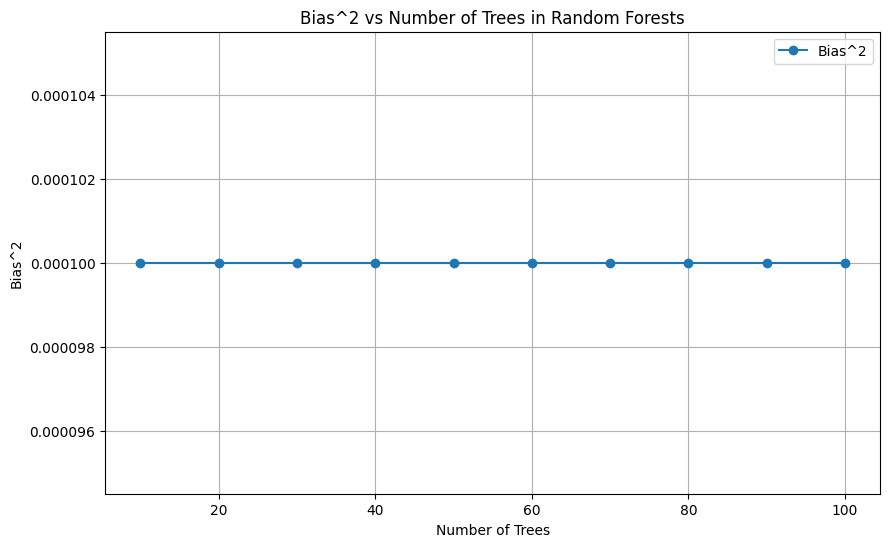

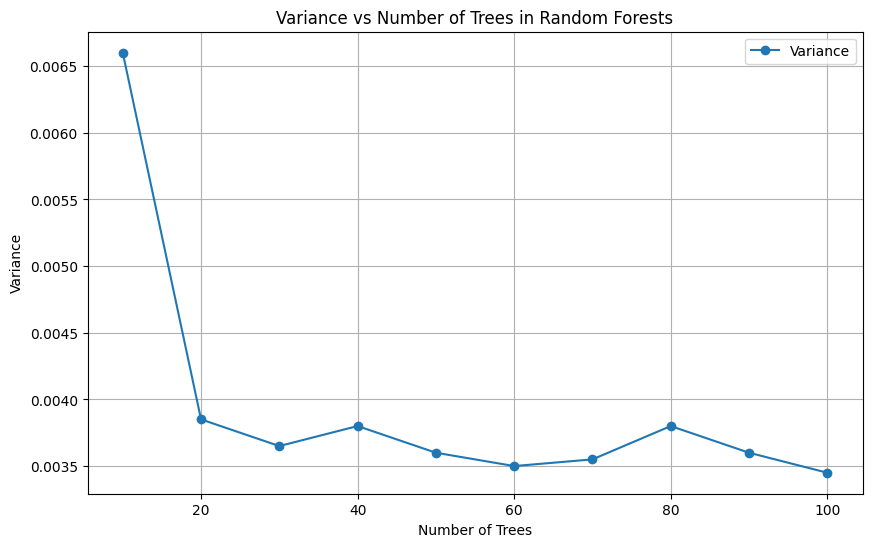

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
import numpy as np

print("Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests:")
number_of_trees_for_bias_variance = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
biases = []
variances = []

for n in number_of_trees_for_bias_variance:
    rf_clf = RandomForestClassifier(n_estimators=n, max_depth=7, random_state=42) #initialize random forest classifier
    # apply bias_variance_decomp to compute bias and variance
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(rf_clf, X_train.to_numpy(), y_train, X_test.to_numpy(), y_test, loss='0-1_loss', random_seed=42)
    biases.append(avg_bias)
    variances.append(avg_var)

# plot the bias^2 against the number of trees
plt.figure(figsize=(10, 6))
plt.plot(number_of_trees_for_bias_variance, np.array(biases)**2, marker='o', label='Bias^2')
plt.xlabel('Number of Trees')
plt.ylabel('Bias^2')
plt.title('Bias^2 vs Number of Trees in Random Forests')
plt.legend()
plt.grid()
plt.show()
print('as the number of Trees increases from 10 to 100 gradually, the square of bias tend to remain the same')
# plot variance against the number of trees
plt.figure(figsize=(10, 6))
plt.plot(number_of_trees_for_bias_variance, variances, marker='o', label='Variance')
plt.xlabel('Number of Trees')
plt.ylabel('Variance')
plt.title('Variance vs Number of Trees in Random Forests')
plt.legend()
plt.grid()
plt.show()
print('as the number of trees increases, the variance tend to decrease')
